# Images as Grids of Pixels

In [1]:
import numpy as np
import matplotlib.image as mpimg  
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import cv2  
import copy
import os

import pandas as pd


%matplotlib inline

In [5]:

IMG_ROOT = '../Dataset/kitti/training/image_2/'



print(f"Number of  images: {len(os.listdir(IMG_ROOT) )}")


Number of  images: 7481


In the codes below we will use OpenCV to load an images , which will use as our training image. Since, the `cv2.imread()` function loads images as BGR we will convert our image to RGB  `cv2.cvtColor()`so we can display it with the correct colors. As usual we will convert our BGR image to Gray scale for analysis.

Image dimensions: (375, 1242, 3)


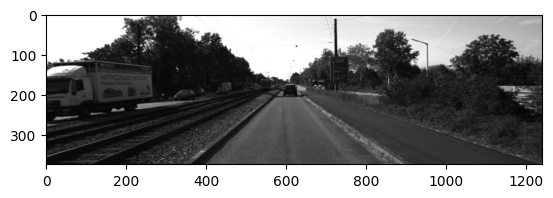

In [6]:
# Read in the image
image = cv2.imread(IMG_ROOT +'/000137.png' , 0)
image = cv2.cvtColor(image , cv2.COLOR_BGR2RGB)
print('Image dimensions:', image.shape)
plt.imshow(image)
plt.show()

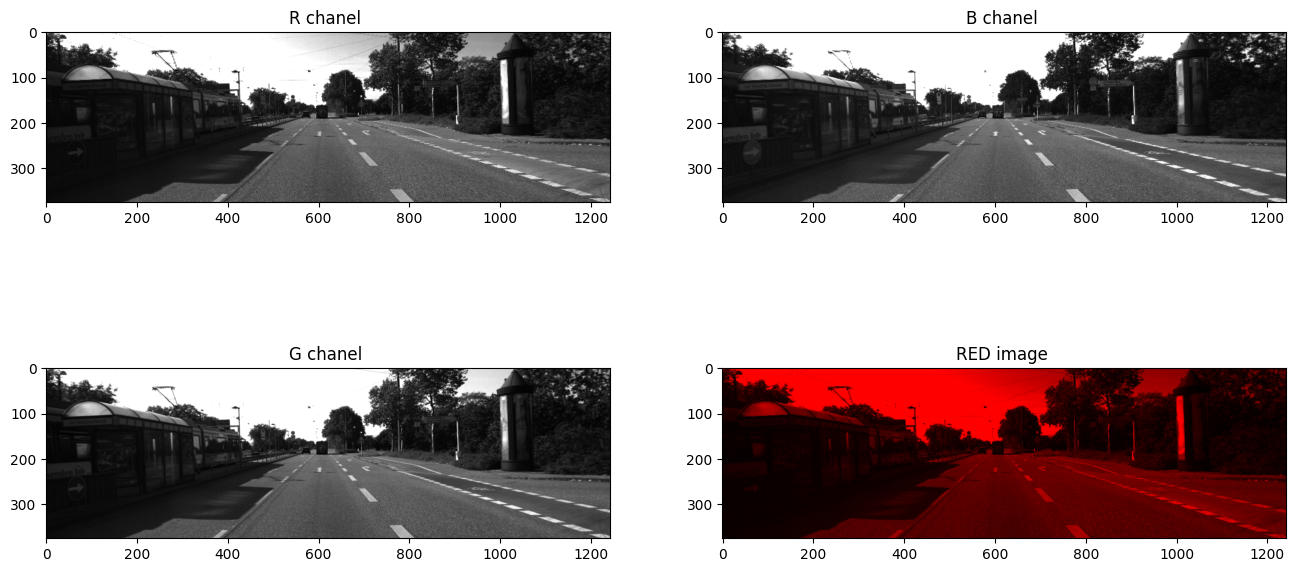

In [7]:
image =mpimg.imread(IMG_ROOT +'/000081.png')
# red chanel  
r =image[:,:,0]
# green chanel  
g =image[:,:,1]
# blue  chanel  
b =image[:,:,2]

red =image.copy()
red[:,:,1]=0
red[:,:,2]=0
fig,ax = plt.subplots(2,2,figsize=(16,8))
ax[0,0].set_title('R chanel ')
ax[0,0].imshow(r, cmap='gray')
ax[1,0].set_title('G chanel ')
ax[1,0].imshow(g, cmap='gray')
ax[0,1].set_title('B chanel ')
ax[0,1].imshow(b, cmap='gray')
ax[1,1].set_title('RED image ')
ax[1,1].imshow(red , cmap='gray')
plt.show()

# Color Threshold

In [21]:
# Read in the image
image = cv2.imread('images/pizza_bluescreen.jpg')


print(f'This image is: {type(image)} \nwith dimensions: {image.shape}')


This image is: <class 'numpy.ndarray'> 
with dimensions: (514, 816, 3)


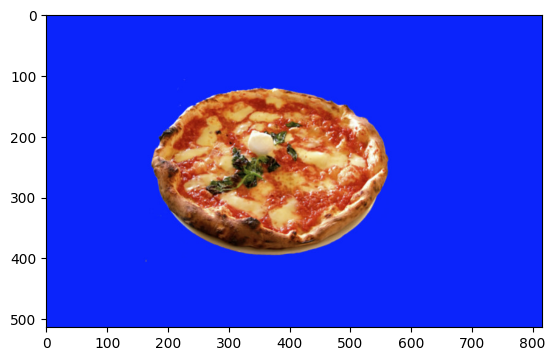

In [22]:
image_copy = np.copy(image)

# Change color to RGB (from BGR)
image_copy = cv2.cvtColor(image_copy, cv2.COLOR_BGR2RGB)

# Display the image copy
plt.imshow(image_copy)

plt.show()

# Define the color threshold
## Create a mask

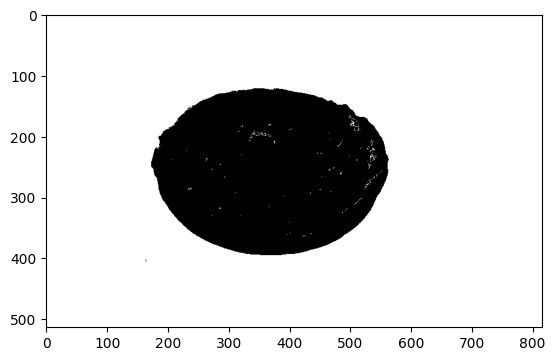

In [23]:
lower_blue = np.array([0,0,220]) 
upper_blue = np.array([250,250,255])
mask = cv2.inRange(image_copy ,lower_blue , upper_blue)
plt.imshow(mask ,cmap = 'gray')
plt.show()

im_c  type :<class 'numpy.ndarray'> the shape is (514, 816, 3)

mask  type :<class 'numpy.ndarray'>
 the shape is (514, 816, 3)


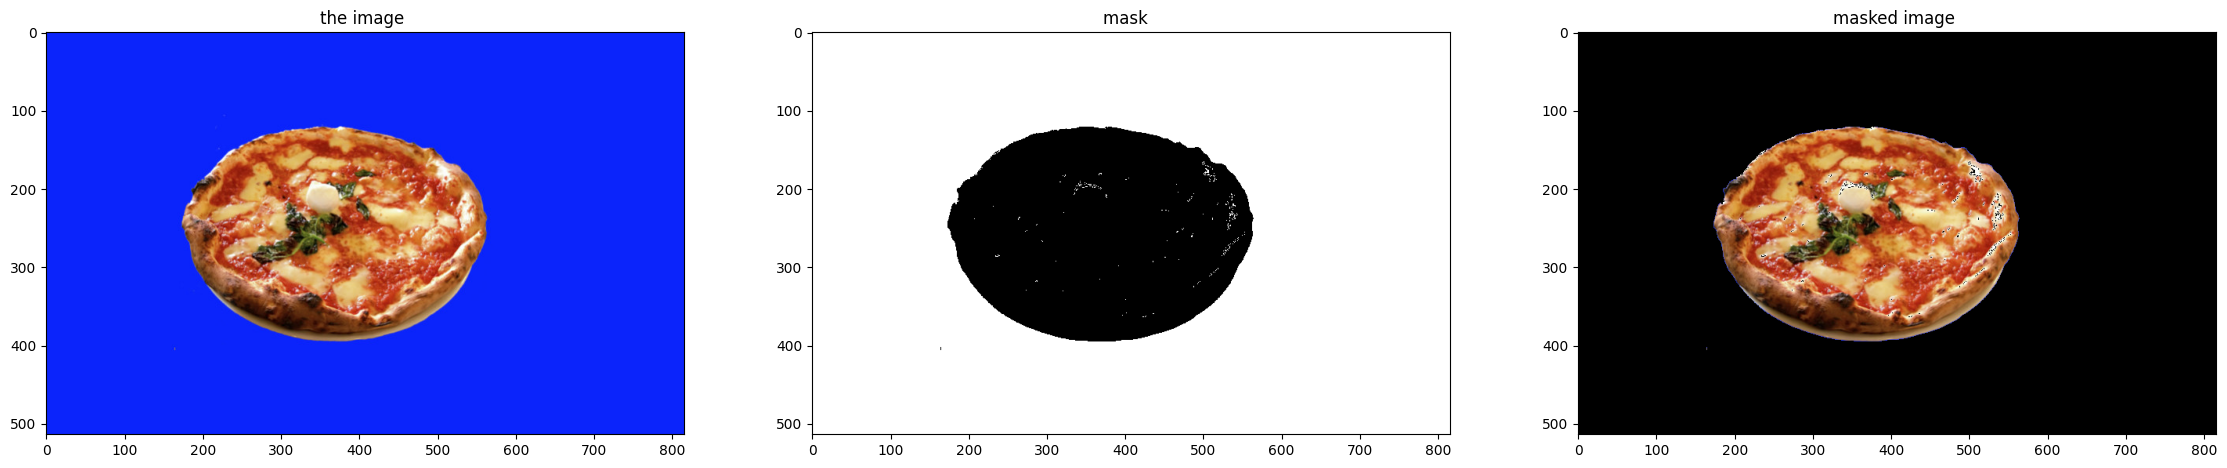

In [24]:
masked_image =np.copy(image_copy)
print(f'im_c  type :{type(image_copy)} the shape is {image_copy.shape}\n')
print(f'mask  type :{type(masked_image)}\n the shape is {masked_image.shape}')


masked_image[mask != 0]=[0,0,0]

fig ,ax =plt.subplots(1,3 , figsize =(28,8))
ax[0].set_title('the image ')
ax[0].imshow(image_copy )
ax[1].set_title('mask  ')
ax[1].imshow(mask,cmap='gray')
ax[2].set_title('masked image ')
ax[2].imshow(masked_image)
plt.show()

# Mask and add a background image

the background image shape (1047, 1920, 3)
the masked image shape (514, 816, 3)


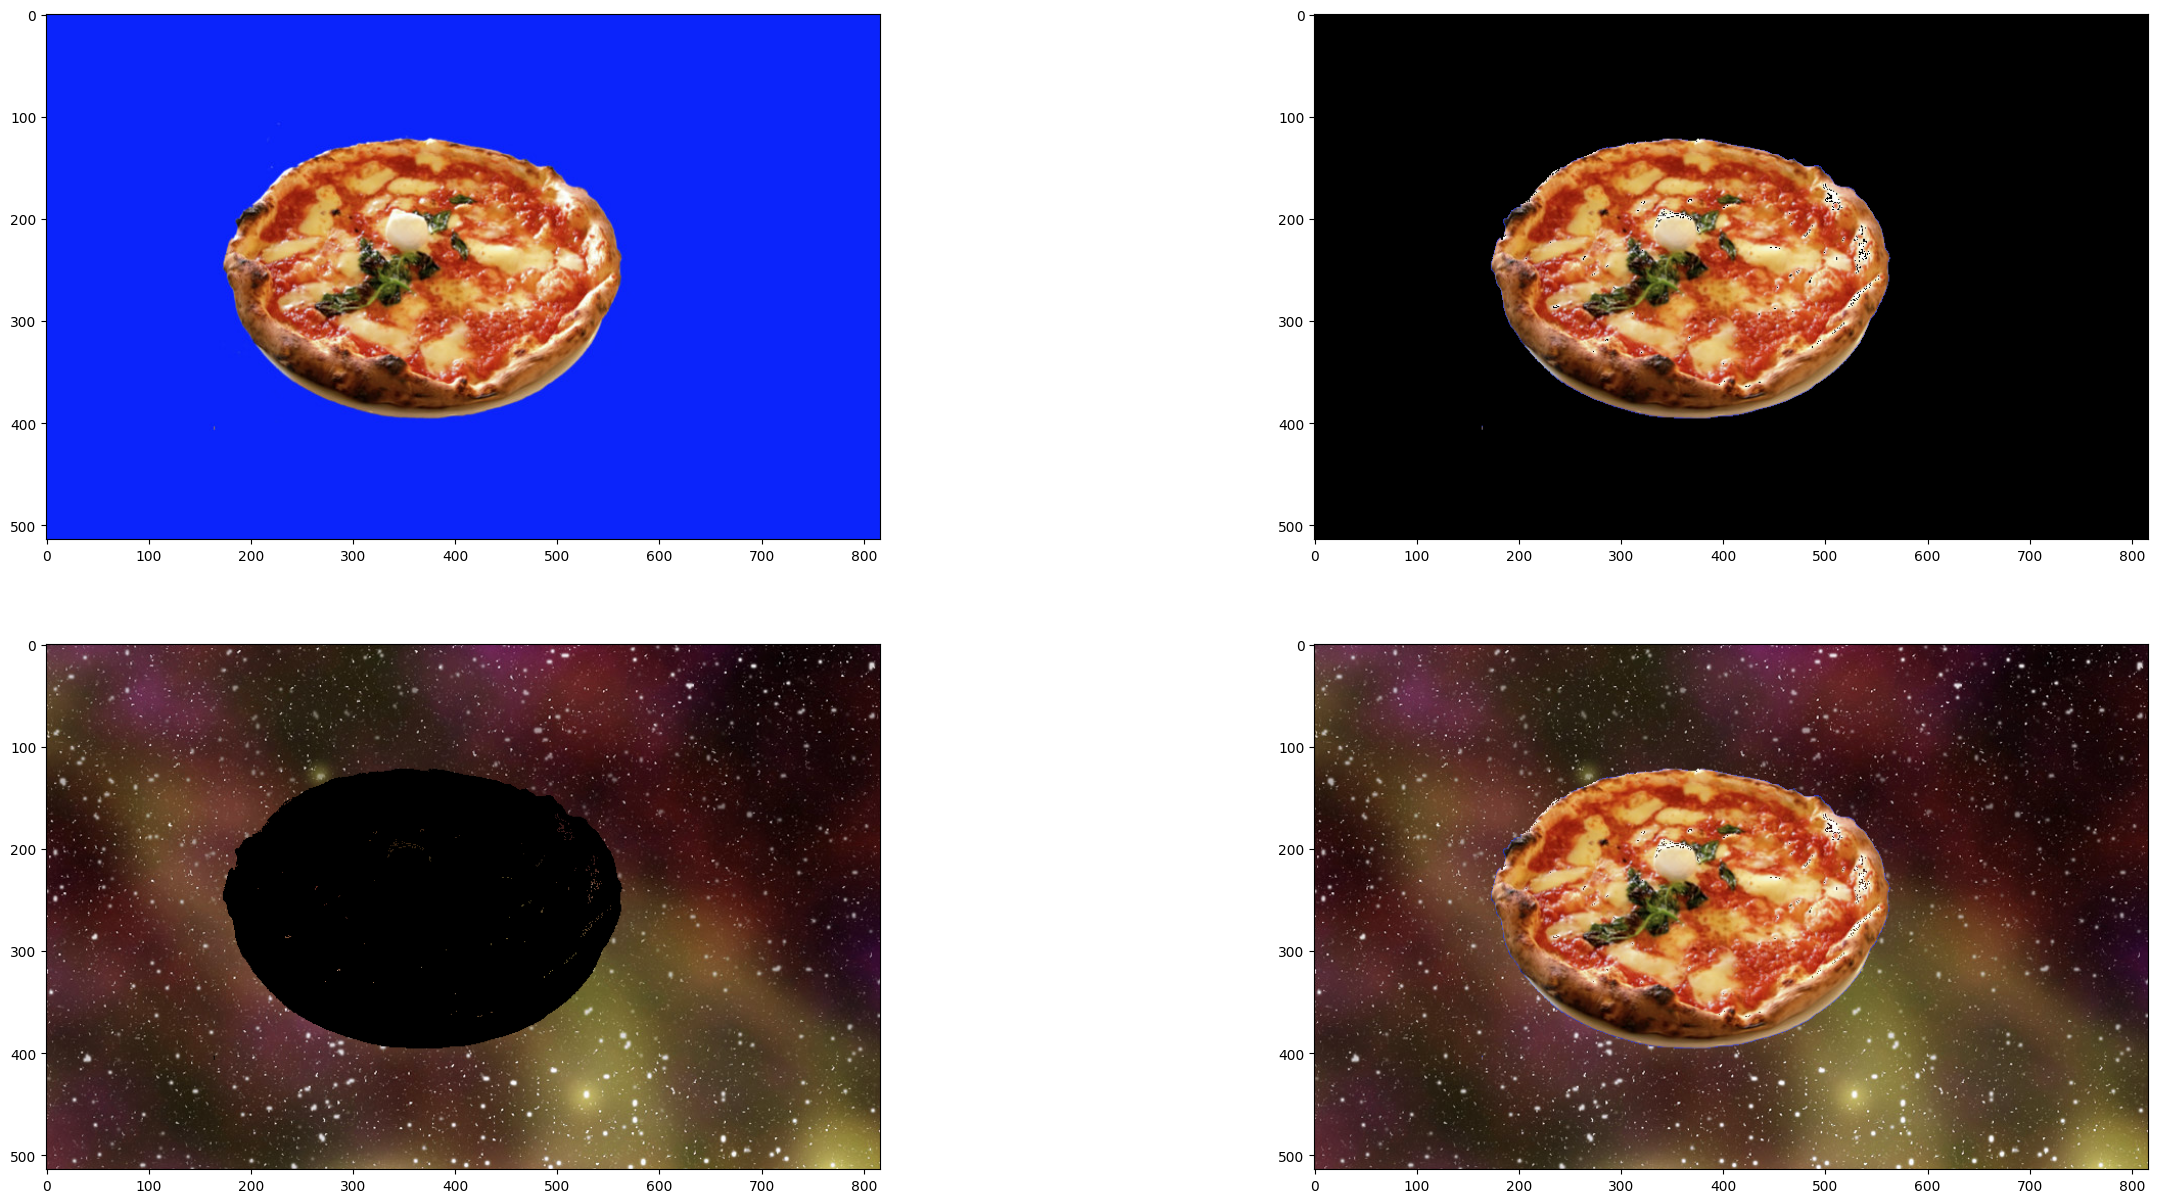

In [25]:
abackground_image = cv2.imread('../images/space_background.jpg')
background_image =cv2.cvtColor(abackground_image , cv2.COLOR_BGR2RGB)
print(f'the background image shape {background_image.shape}')
print(f'the masked image shape {image.shape}')
s =image_copy.shape

crop_background = abackground_image[0:s[0],0:s[1]]
cc = np.copy(crop_background)
cc[ mask == 0]=[0,0,0]
xx = masked_image +cc
fig ,ax =plt.subplots(2,2 , figsize =(30,15))
ax[0,0].imshow(image_copy )
ax[0,1].imshow(masked_image,cmap='gray')
ax[1,0].imshow(cc)
ax[1,1].imshow(xx)
plt.show()

In [27]:
# read image 
image = mpimg.imread('images/car_green_screen.jpg')
print(f'image Dimensions : {image.shape}')

# creat threshold 
lower_green = np.array([0,150, 20])
upper_green = np.array([250,255,250])

# creat mask 
mask = cv2.inRange(image ,lower_green ,upper_green)

# masked image 
masked_image = np.copy(image)
masked_image[mask != 0 ]= [0,0,0]

# read background image 
background_image = mpimg.imread('../images/sky.jpg')
print(f'the background image shape {background_image.shape}')
print(f'the masked image shape {image.shape}')

shape = image.shape
crop_background = background_image[0:shape[0],0:shape[1]]

cc = np.copy(crop_background)
cc[mask == 0] = [0,0,0]
xx = cc + masked_image

image Dimensions : (450, 660, 3)
the background image shape (575, 1024, 3)
the masked image shape (450, 660, 3)


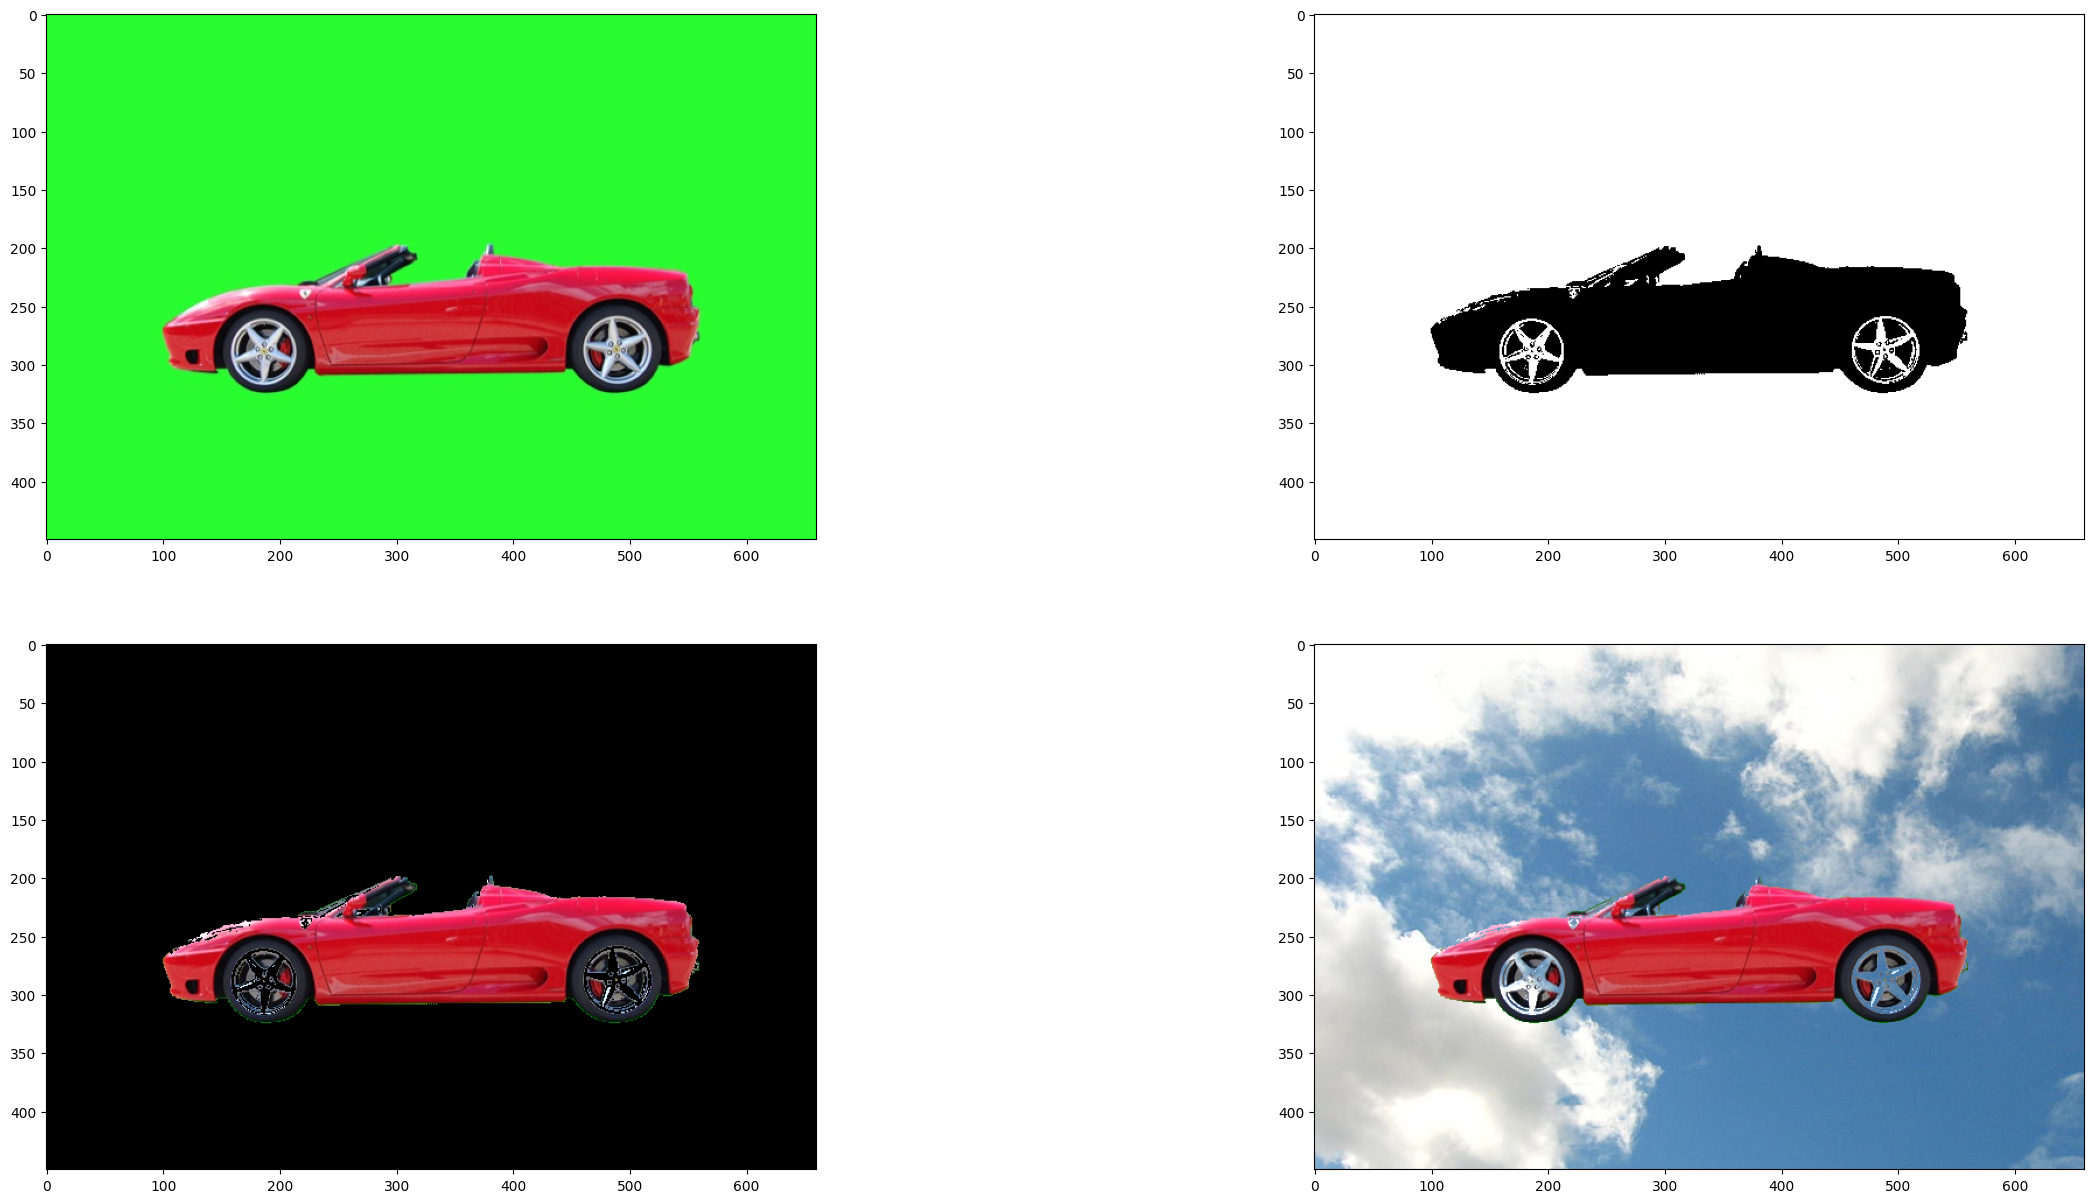

In [28]:
fig ,ax =plt.subplots(2,2 , figsize =(30,15))
ax[0,0].imshow(image)
ax[0,1].imshow(mask,cmap='gray')
ax[1,0].imshow(masked_image)
ax[1,1].imshow(xx)
plt.show()

# HSV Color Space 

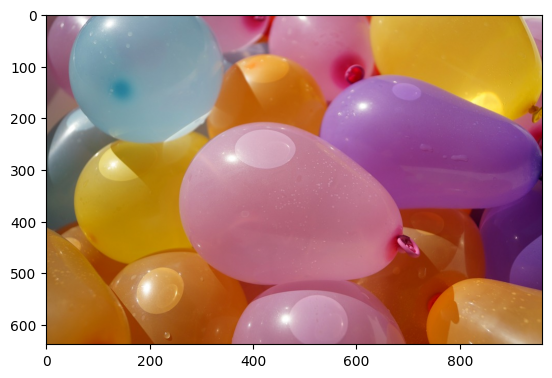

In [30]:
image = cv2.imread('images/water_balloons.jpg')

# Make a copy of the image
image_copy = np.copy(image)

# Change color to RGB from BGR)
image = cv2.cvtColor(image_copy, cv2.COLOR_BGR2RGB)

plt.imshow(image)
plt.show()

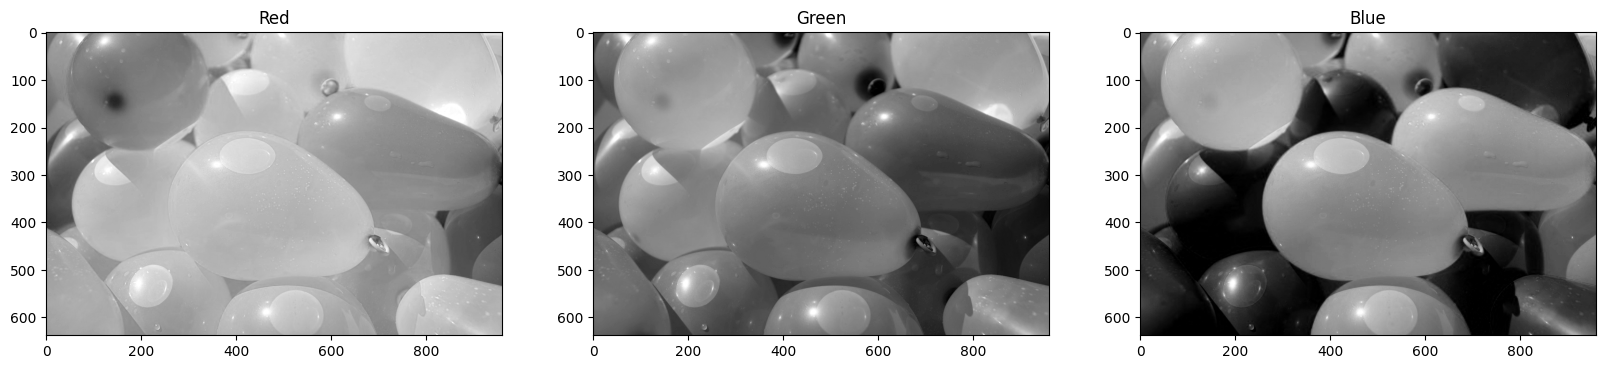

In [31]:
# RGB channels
r = image[:,:,0]
g = image[:,:,1]
b = image[:,:,2]
f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20,10))

ax1.set_title('Red')
ax1.imshow(r, cmap='gray')

ax2.set_title('Green')
ax2.imshow(g, cmap='gray')

ax3.set_title('Blue')
ax3.imshow(b, cmap='gray')

plt.show()

## Convert from RGB to HSV


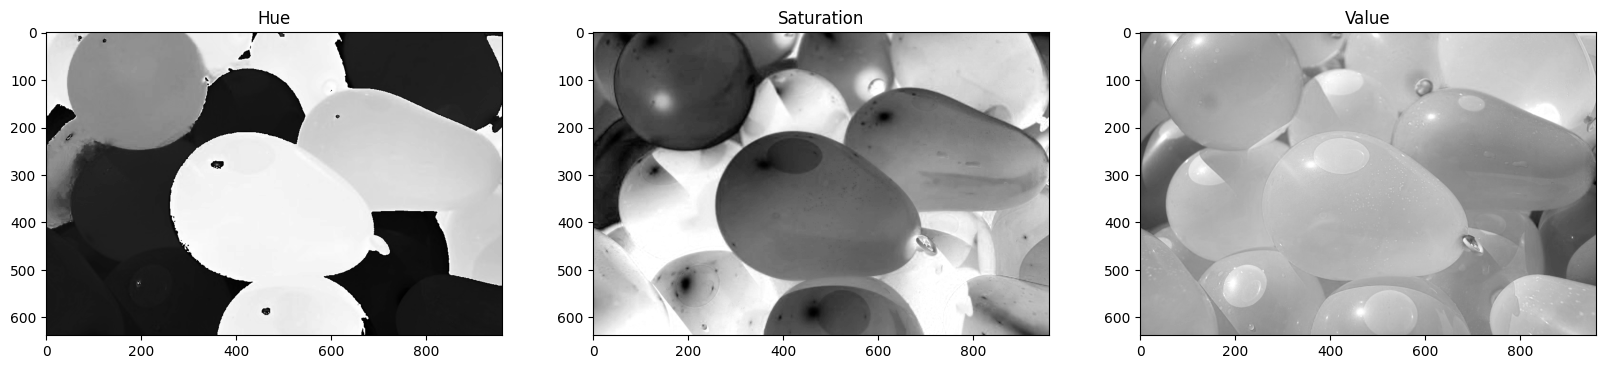

In [32]:
# Convert from RGB to HSV
hsv = cv2.cvtColor(image, cv2.COLOR_RGB2HSV)

# HSV channels
h = hsv[:,:,0]
s = hsv[:,:,1]
v = hsv[:,:,2]

f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20,10))

ax1.set_title('Hue')
ax1.imshow(h, cmap='gray')

ax2.set_title('Saturation')
ax2.imshow(s, cmap='gray')

ax3.set_title('Value')
ax3.imshow(v, cmap='gray')

plt.show()

## Define pink and hue selection thresholds

In [33]:
# Define our color selection criteria in HSV values
lower_hue = np.array([160,0,0]) 
upper_hue = np.array([180,255,255])

# Define our color selection criteria in RGB values
lower_pink = np.array([180,0,100]) 
upper_pink = np.array([255,255,230])


# Mask the image

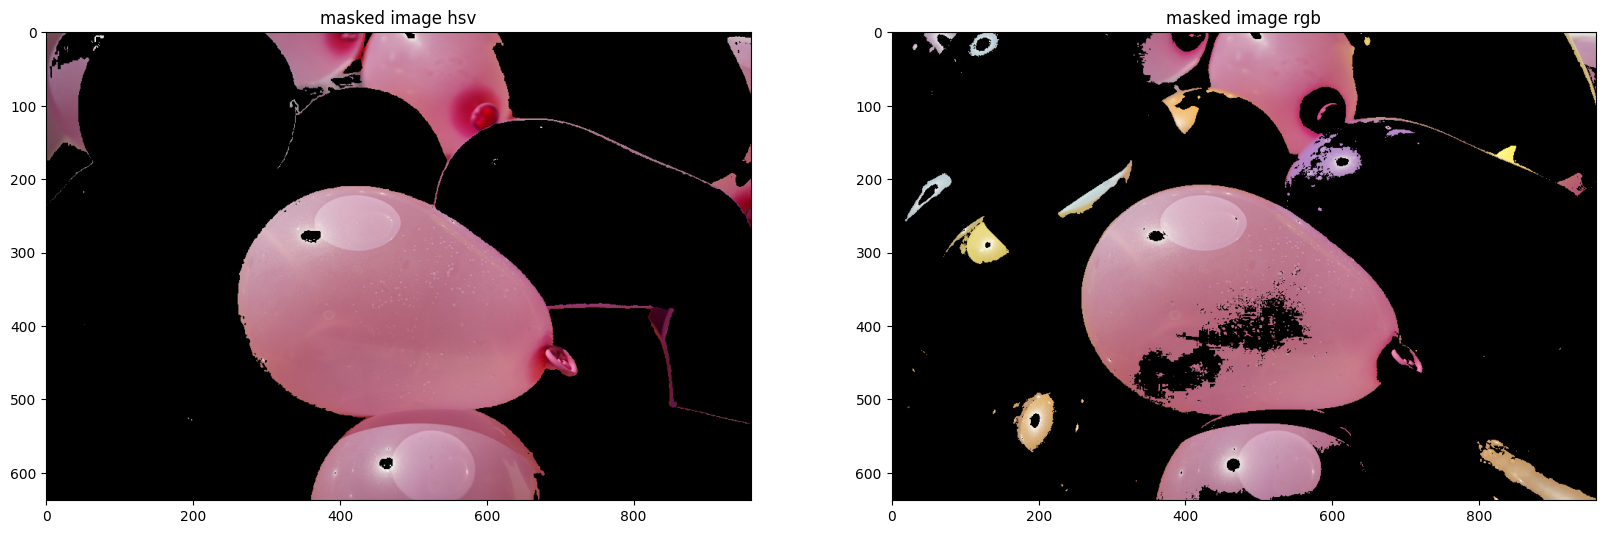

In [34]:
# Define the masked area in RGB space
mask_rgb = cv2.inRange(image, lower_pink, upper_pink)

# Define the masked area in HSV space
mask_hsv = cv2.inRange(hsv, lower_hue, upper_hue)

# mask the image
masked_image_rgb = np.copy(image)
masked_image_rgb[mask_rgb==0] = [0,0,0]

# mask the image
masked_image_hsv = np.copy(image)
masked_image_hsv[mask_hsv==0] = [0,0,0]

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,10))

ax1.set_title('masked image hsv')
ax1.imshow(masked_image_hsv)

ax2.set_title('masked image rgb')
ax2.imshow(masked_image_rgb)

plt.show()

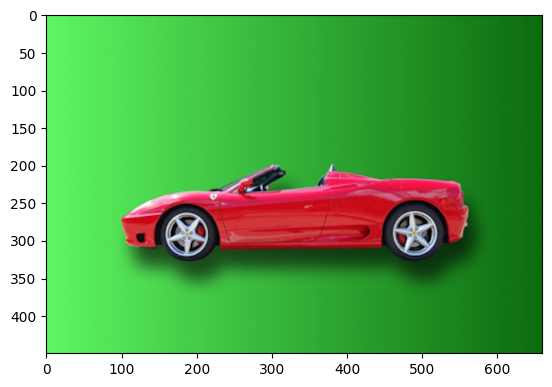

In [35]:
# Read in the image
image = mpimg.imread('images/car_green_screen2.jpg')
plt.imshow(image)

### RGB threshold 

Visualize the green threshold you defined in the previous, consistent green color case.

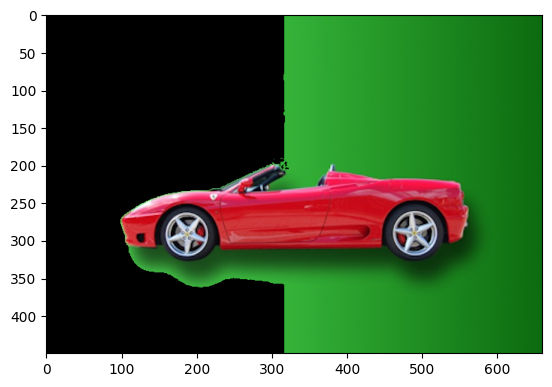

In [36]:
# Define our color selection boundaries in RGB values
lower_green = np.array([0,180,0]) 
upper_green = np.array([100,255,100])


# Define the masked area
mask = cv2.inRange(image, lower_green, upper_green)

# Mask the image to let the car show through
masked_image_rgb = np.copy(image)
masked_image_rgb[mask != 0] = [0, 0, 0]


plt.imshow(masked_image_rgb)
plt.show()

### Convert to HSV

RGB


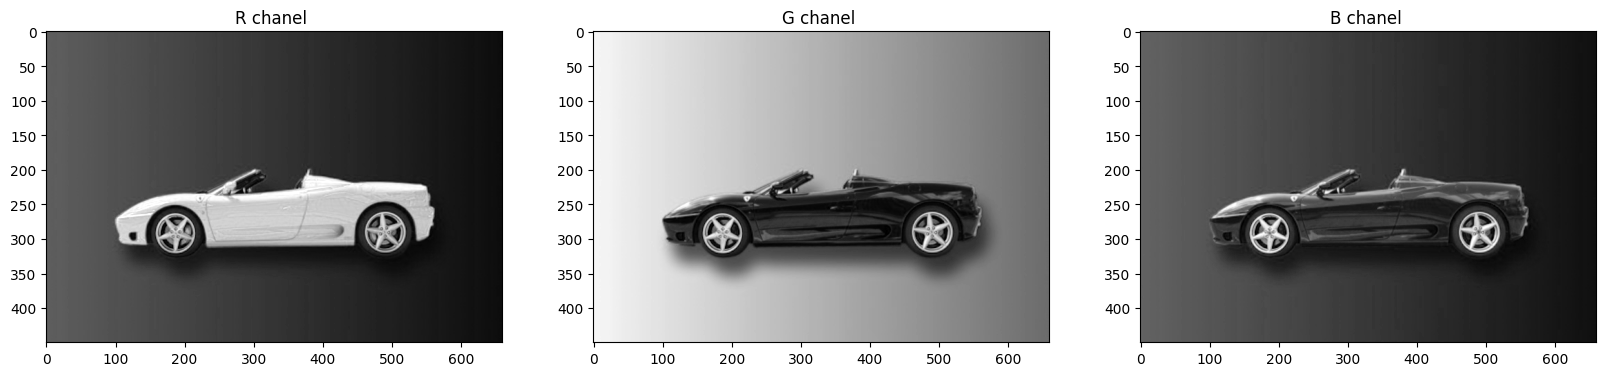



HSV


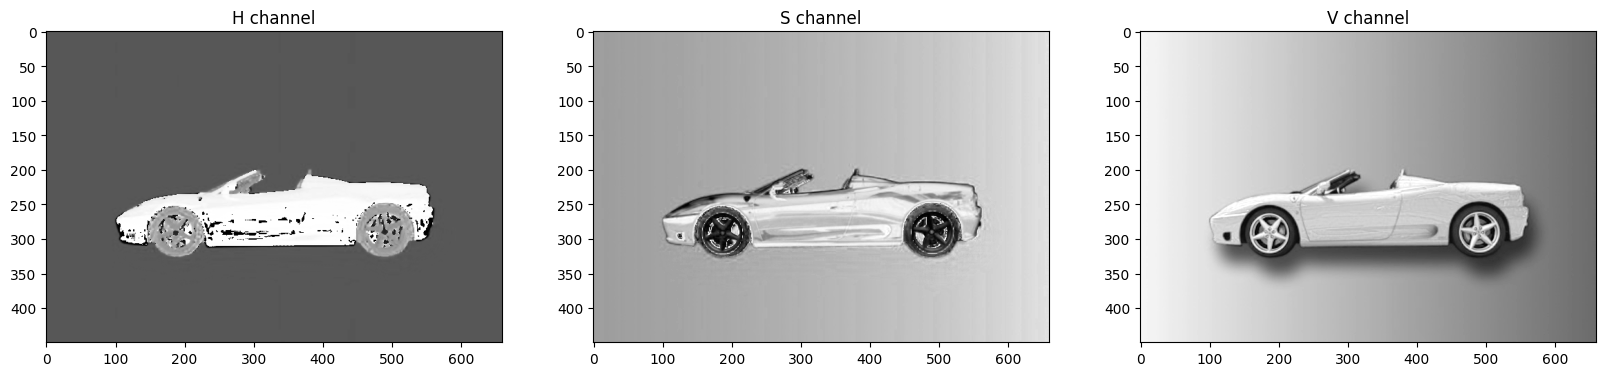

In [37]:
# Convert to HSV
hsv = cv2.cvtColor(image, cv2.COLOR_RGB2HSV)

# HSV channels
h = hsv[:,:,0]
s = hsv[:,:,1]
v = hsv[:,:,2]


# RGB channels
r =image[:,:,0]
g =image[:,:,1]  
b =image[:,:,2]

print('RGB')

# Visualize the RGB color channels
f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20,10))
ax1.set_title('R chanel ')
ax1.imshow(r, cmap='gray')
ax2.set_title('G chanel ')
ax2.imshow(g, cmap='gray')
ax3.set_title('B chanel ')
ax3.imshow(b , cmap='gray')
plt.show()
print('\n\nHSV')


# Visualize the HSV color channels
f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20,10))
ax1.set_title('H channel')
ax1.imshow(h, cmap='gray')
ax2.set_title('S channel')
ax2.imshow(s, cmap='gray')
ax3.set_title('V channel')
ax3.imshow(v, cmap='gray')
plt.show()

### Mask the green area using HSV color space

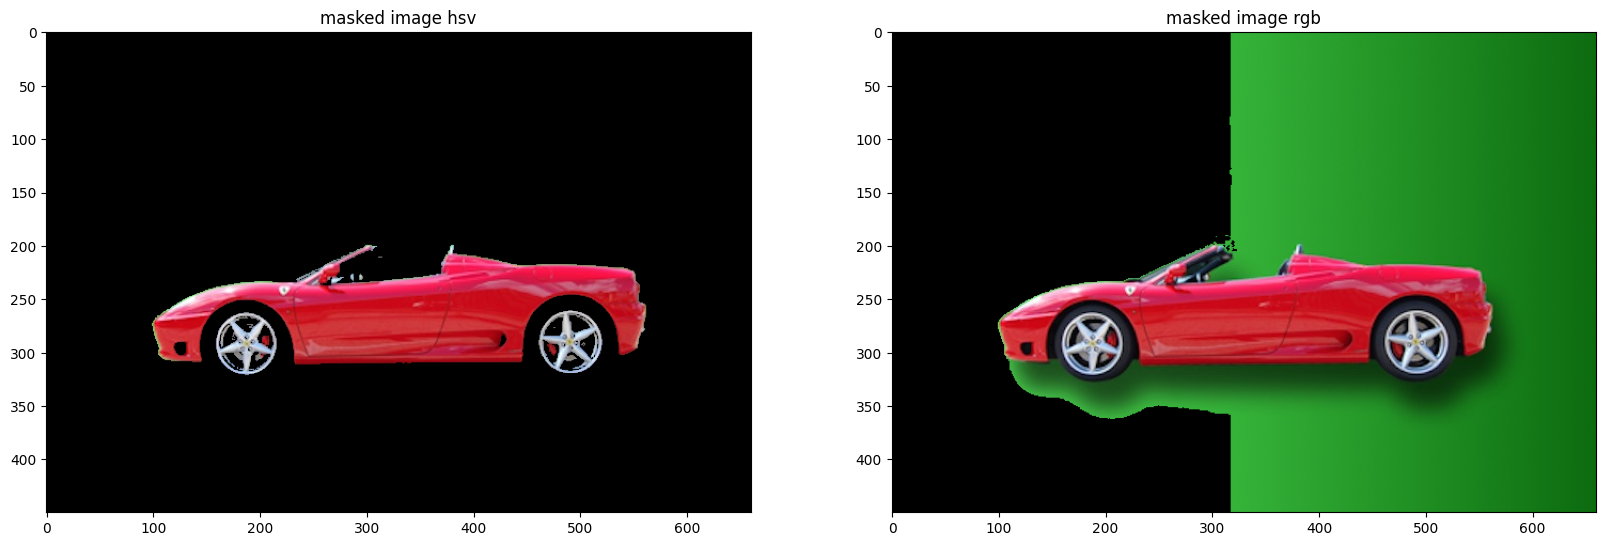

In [38]:
lower_hue = np.array([0,0,0]) 
upper_hue = np.array([110,250,250])

# Define the mask
mask = cv2.inRange(image, lower_hue, upper_hue)

# Mask the image to let the car show through
masked_image = np.copy(image)

masked_image[mask != 0] = [0, 0, 0]


f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,10))

ax1.set_title('masked image hsv')
ax1.imshow(masked_image)

ax2.set_title('masked image rgb')
ax2.imshow(masked_image_rgb)

plt.show()

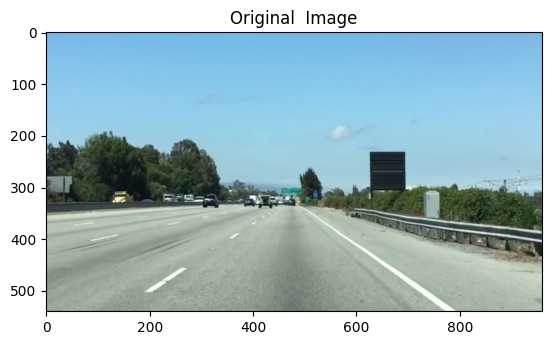

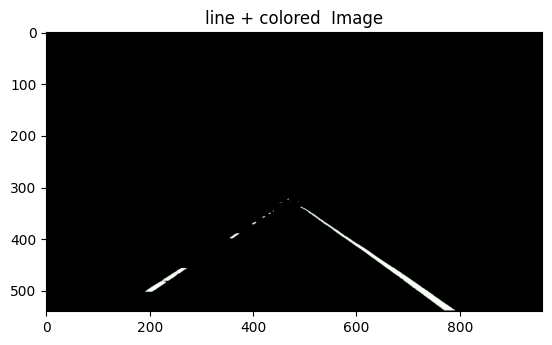

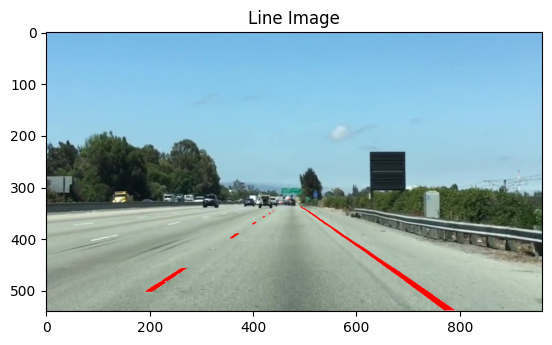

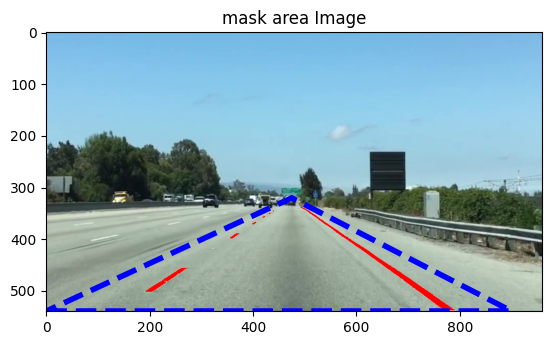

In [39]:
# Read in the image
image = mpimg.imread('images/test.jpg')

# Grab the x and y size and make a copy of the image
ysize = image.shape[0]
xsize = image.shape[1]
color_select = np.copy(image)
line_image = np.copy(image)

red_threshold = 200
green_threshold = 200
blue_threshold = 200

rgb_threshold = [red_threshold, green_threshold, blue_threshold]

# Define the vertices of a triangular mask.
# Keep in mind the origin (x=0, y=0) is in the upper left

left_bottom = [0, 539]
right_bottom = [900, 539]
apex = [475, 320]




# Perform a linear fit (y=Ax+B) to each of the three sides of the triangle
# np.polyfit returns the coefficients [A, B] of the fit
fit_left = np.polyfit((left_bottom[0], apex[0]), (left_bottom[1], apex[1]), 1)
fit_right = np.polyfit((right_bottom[0], apex[0]), (right_bottom[1], apex[1]), 1)
fit_bottom = np.polyfit((left_bottom[0], right_bottom[0]), (left_bottom[1], right_bottom[1]), 1)

# Mask pixels below the threshold
color_thresholds = (image[:,:,0] < rgb_threshold[0]) |  (image[:,:,1] < rgb_threshold[1]) | (image[:,:,2] < rgb_threshold[2])

# Find the region inside the lines
XX, YY = np.meshgrid(np.arange(0, xsize), np.arange(0, ysize))
region_thresholds = (YY > (XX*fit_left[0] + fit_left[1])) & (YY > (XX*fit_right[0] + fit_right[1])) & (YY < (XX*fit_bottom[0] + fit_bottom[1]))


# Mask color and region selection
color_select[color_thresholds | ~region_thresholds] = [0, 0, 0]

# Color pixels red where both color and region selections met
line_image[~color_thresholds & region_thresholds] = [255, 0, 0]

# Display the image and show region and color selections
plt.imshow(image)
plt.title('Original  Image')
plt.show()
plt.imshow(color_select)
plt.title('line + colored  Image')
plt.show()
plt.imshow(line_image)
plt.title('Line Image')
plt.show()

plt.imshow(line_image)
x = [left_bottom[0], right_bottom[0], apex[0], left_bottom[0]]
y = [left_bottom[1], right_bottom[1], apex[1], left_bottom[1]]
plt.plot(x, y, 'b--', lw=4)
plt.title('mask area Image')
plt.show()

# first project Day and Night Image Classifier

The day/night image dataset consists of 200 RGB color images in two categories: day and night. There are equal numbers of each example: 100 day images and 100 night images.

We'd like to build a classifier that can accurately label these images as day or night, and that relies on finding distinguishing features between the two types of images!

All images come from the [AMOS dataset](http://cs.uky.edu/~jacobs/datasets/amos/) (Archive of Many Outdoor Scenes).

In [40]:
import os ,random
import glob 

In [41]:
def load_dataset(images_dir):
    '''
This function loads in images and their labels and places them in a list
The list contains all images and their associated labels
For example, after data is loaded, im_list[0][:] will be the first image-label pair in the list
    '''
    im_list =[]
    image_types =os.listdir(images_dir)
    for image_type in image_types :
        for fail in glob.glob(os.path.join(images_dir,image_type ,'*')) :
            im =cv2.imread(fail)
            im =cv2.cvtColor(im ,cv2.COLOR_BGR2RGB) 
            if not im is None :
                im_list.append((im ,image_type))
    print(f'The DataSet is Loaded')
    return im_list

## Training and Testing Data
The 200 day/night images are separated into training and testing datasets. 

* 60% of these images are training images, for you to use as you create a classifier.
* 40% are test images, which will be used to test the accuracy of your classifier.

First, we set some variables to keep track of some where our images are stored:


### Pre-process the Data

In [42]:
# This function should take in an RGB image and return a new, standardized version
def standardize_input(image , image_shape =(1100 , 600)):
    standar_image = cv2.resize(image , image_shape)
    return standar_image

# encode("day") should return: 1
# encode("night") should return: 0
def encode(label):
    numerical_val = 0
    if label == 'day' :
        numerical_val =1
    return numerical_val


def standardize(image_list,image_shape=(1100 , 600)):
# This function takes in a list of image-label pairs and outputs a standardized list of resized images and numerical labels.
# This uses the functions you defined above to standardize the input and output, so those functions must be complete for this standardization to work
    
    standard_list = []
    for item in image_list :
        image = item[0]
        label =item[1]
        standardized_im = standardize_input(image,image_shape)
        binary_label =encode(label)
        standard_list.append((standardized_im , binary_label))
    print(f'The DataSet is Standrd and enconded ....')
    return standard_list


### Visualize the standardized data

In [43]:
path ="Dataset/day_night_images"
image_dir= os.listdir(path)
image_dir_training = os.path.join(path,image_dir[1])
image_dir_test =os.path.join(path,image_dir[0])
image_traning = load_dataset(image_dir_training)

The DataSet is Loaded


image Shape is : (469, 640, 3)


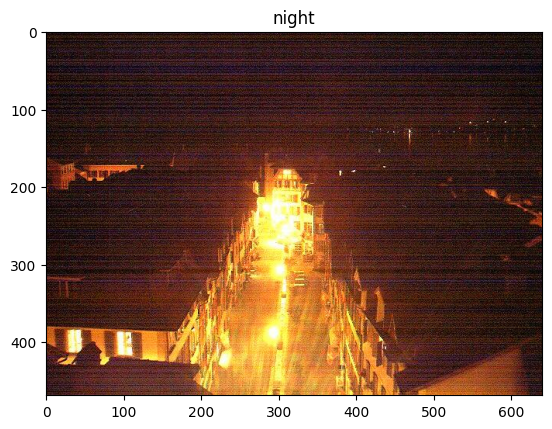

In [44]:
index= 210
image = image_traning[index][0]
title =image_traning[index][1]
plt.title(title)
plt.imshow(image)
print(f'image Shape is : {image.shape}')

In [45]:
image_shape =(1000,1000)
standardize_traning = standardize(image_traning)

The DataSet is Standrd and enconded ....


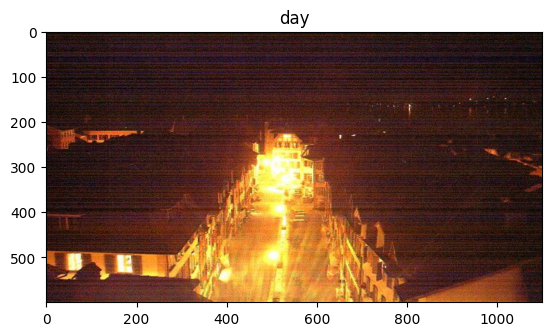

image Shape is : (600, 1100, 3)
Label [1 = day, 0 = night] :  0


In [46]:
index= 210
image = standardize_traning[index][0]
title_code =standardize_traning[index][1]
if title_code==0 :
    title ='day'
else :
    title ='night'
plt.title(title)
plt.imshow(image)
plt.show()
print(f'image Shape is : {image.shape}')
print(f'Label [1 = day, 0 = night] :  {title_code}')

# Feature Extraction
I want to create a feature that displays the brightness in an image.
We'll be extracting the average brightness using HSV colorspace. Specifically, we'll use the V channel (a measure of brightness), add up the pixel values in the V channel, then divide that sum by the area of the image to get the average Value of the image.


#### RGB to HSV conversion
Below, a test image is converted from RGB to HSV colorspace and each component is displayed in an image.

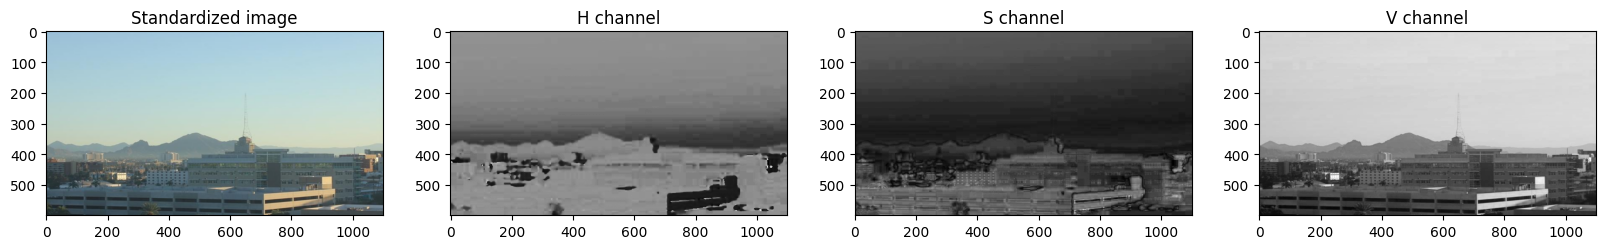

In [47]:
index= 0
image = standardize_traning[index][0]
title_code =standardize_traning[index][1]
hsv = cv2.cvtColor(image, cv2.COLOR_RGB2HSV)

h = hsv[:,:,0]
s = hsv[:,:,1]
v = hsv[:,:,2]

f, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(20,10))
ax1.set_title('Standardized image')
ax1.imshow(image)
ax2.set_title('H channel')
ax2.imshow(h, cmap='gray')
ax3.set_title('S channel')
ax3.imshow(s, cmap='gray')
ax4.set_title('V channel')
ax4.imshow(v, cmap='gray')
plt.show()

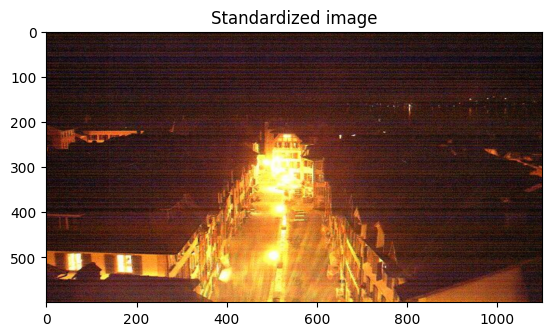

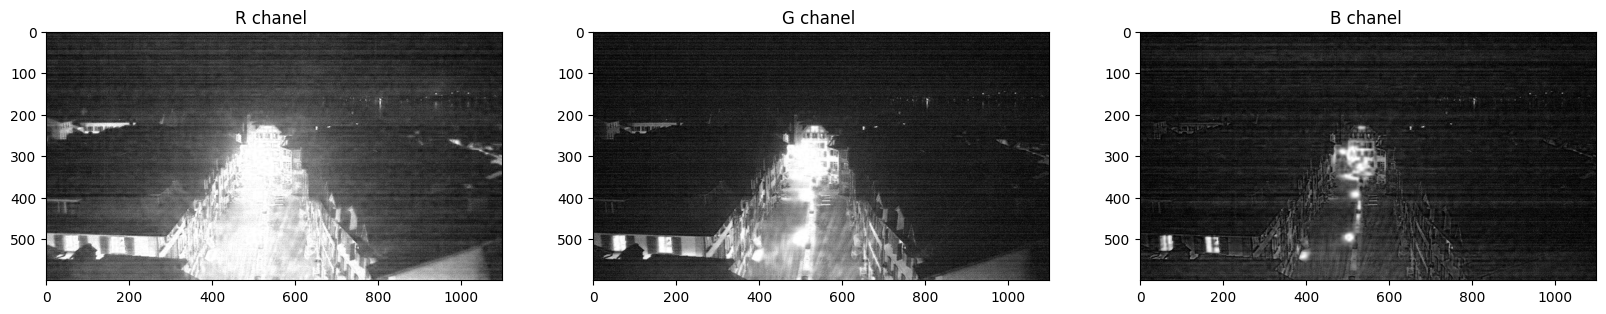

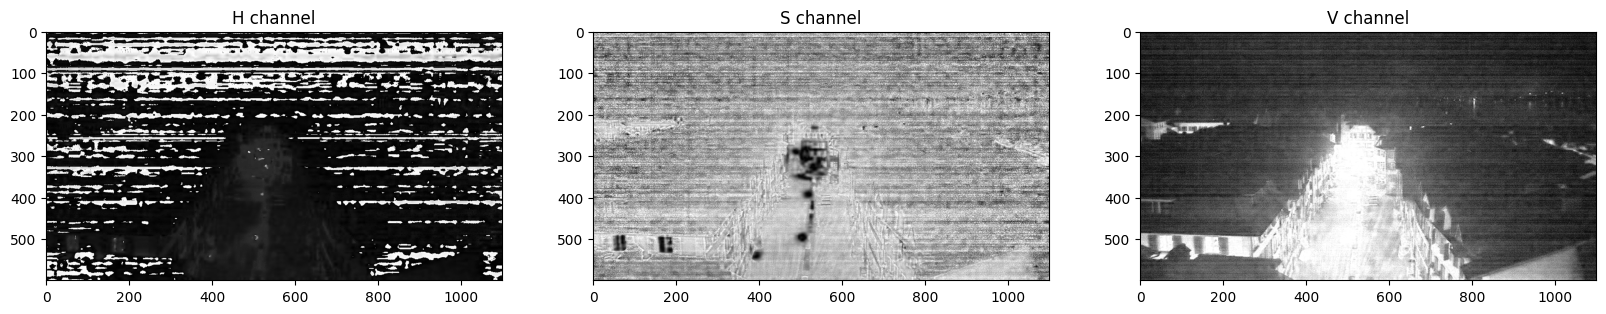

In [48]:
index= 210
image = standardize_traning[index][0]
title_code =standardize_traning[index][1]
hsv = cv2.cvtColor(image, cv2.COLOR_RGB2HSV)

# HSV channels
h = hsv[:,:,0]
s = hsv[:,:,1]
v = hsv[:,:,2]


# RGB channels
r =image[:,:,0]
g =image[:,:,1]  
b =image[:,:,2]

plt.title('Standardized image')
plt.imshow(image)
plt.show()

# Visualize the RGB color channels
f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20,10))
ax1.set_title('R chanel ')
ax1.imshow(r, cmap='gray')
ax2.set_title('G chanel ')
ax2.imshow(g, cmap='gray')
ax3.set_title('B chanel ')
ax3.imshow(b , cmap='gray')
plt.show()


# Visualize the HSV color channels
f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20,10))
ax1.set_title('H channel')
ax1.imshow(h, cmap='gray')
ax2.set_title('S channel')
ax2.imshow(s, cmap='gray')
ax3.set_title('V channel')
ax3.imshow(v, cmap='gray')
plt.show()

## the average brightness using the V channel

This function takes in a standardized RGB image and returns a feature (a single value) that represent the average level of brightness in the image. We'll use this value to classify the image as day or night.

In [49]:
# Find the average Value or brightness of an image

def avg_brightness(image_rgb,image_shape =(1100 , 600)):
    hsv = cv2.cvtColor(image_rgb, cv2.COLOR_RGB2HSV)
    sum_brightness = np.sum(hsv[:,:,2])
    area = float(image_shape[0]*image_shape[1])
    average = sum_brightness/area
    return average

Average  brightness is : 143.36430454545456


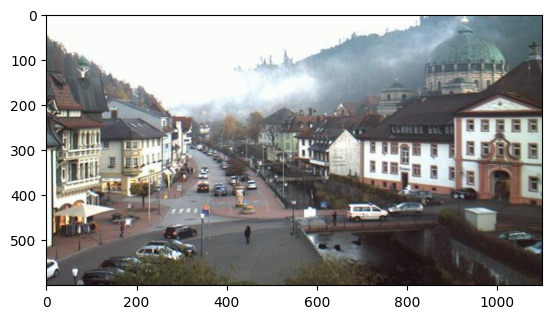

In [50]:
index =100
image_shape =(1100 , 600)
image = standardize_traning[index][0]
avg = avg_brightness(image , image_shape)
print(f'Average  brightness is : {avg}')
plt.imshow(image)
plt.show()

## Classification and Visualizing Error

In [51]:
# This function should take in RGB image input
def estimate_label(rgb_image , threshold=100 ,image_shape =(1100 , 600)):
    avg=avg_brightness(rgb_image ,image_shape)
    predicted_value =0
    if(avg > threshold):
        predicted_value = 1
    
    return predicted_value

## Determine the Accuracy
Compare the output of your classification algorithm (a.k.a. your "model") with the true labels and determine the accuracy.

In [52]:
# Constructs a list of misclassified images given a list of test images and their labels
def get_misClasses(images,threshold=100 ,image_shape =(1100 , 600)):
    misClasses = []
    for i in images :
        image = i[0]
        label_true =i[1]
        predicted = estimate_label(image ,threshold ,image_shape)
        if predicted != label_true :
            misClasses.append((image , predicted))
    return misClasses

In [53]:
# load Dataset
image_test = load_dataset(image_dir_test)
# standardize testing
standardize_testing =standardize(image_test)
# shuffle the test dataset
random.shuffle(standardize_testing)

misClasses = get_misClasses(standardize_testing)
number_all = len(standardize_testing)
number_mis = len(misClasses) 
number_correct =number_all-number_mis
accuracy =float(number_correct/number_all)
print(f'Number the Total Image is : {number_all}'+
      f'\nThe mis Classes is  :{number_mis}\n '+
      f'Accuracy is : {accuracy*100}%')


The DataSet is Loaded
The DataSet is Standrd and enconded ....
Number the Total Image is : 160
The mis Classes is  :12
 Accuracy is : 92.5%


In [54]:
print(f'Number the Total Image is : {len(standardize_testing)}\nThe mis Classes is  :{len(misClasses)}\n ')

Number the Total Image is : 160
The mis Classes is  :12
 
